Assignment Info  
1. Semester: Spring 2021  
2. Title: Programming Assignment  
3. Due: 04/20/2021  
4. Professor: Dr. Arslan  
5. Author: Chiho Kim  

---
System info

In [1]:
#Checking System info
import sys
print(sys.version)

3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)]


---
Question

Consider the following function that defines Fib(n) for all n >= 1:  
Fib(1) = 1; Fib(2) = 1; and for all n >2, Fib(n) = Fib(n-2) + Fib(n-1)

---
Do the following:


1) Write a divide and conquer (recursive) algorithm RFib(n) that calculates Fib(n) for any given n>=1. Your algorithm also prints out how many additions (+ operation) it performs in calculating Fib(n)

In [10]:
add_r = 0 #Recurrence addition counter

def RFib(n): #Recurrence Function for Fibonacci
    global add_r
    if n == 1 or n == 2:
        return 1
    add_r += 1 #addition counter
    return RFib(n-2) + RFib(n-1)

def showRFib(n):
    global add_r
    RFib(n) #Run calculation
    print(f'When n is {n}, RFib(n) has {add_r} additions.')
    add_r=0 #Reset

n = 10
showRFib(n)

When n is 10, RFib(n) has 54 additions.


2) Write a dynamic programming algorithm DFib(n) that calculates Fib(n) for any given n>=1. Your algorithm also prints out how many additions(+ operation) it performs in calculating Fib(n).

In [11]:
add_d = 0 #Dynamic programming addition counter
mem = list() #Memory list(array) for implementation

def DFib(n):
    global add_d 
    global mem 
    tmp = list() #Temporary list variable to prevent unintended errors
    if n >=1:
        tmp.append(1) #F[1]
    if n >=2:
        tmp.append(1) #F[2]
    if n >=3:
        for i in range(2, n): #mem[2]: DFib(3), mem[n-1]: DFib(n). from i=2 to i=n-1
            tmp.insert(i, tmp[i-2]+tmp[i-1])
            add_d += 1
    mem = tmp
    return tmp[n-1]

def showDFib(n):
    global add_d
    global mem
    DFib(n) #Run calculation
    print(f'When n is {n}, DFib(n) has {add_d} additions.')
    add_d=0 #Reset
    mem = [] #Reset

n = 10
showDFib(n)

When n is 10, DFib(n) has 8 additions.


3) Create a table in which you tabulate the number of additions RFib(n) and DFib(n) perform for n=5, 10, 15, 20, 25, 30.  

In [12]:
def reset(): #Reset all
    global add_r
    global add_d
    global mem
    add_r = 0
    add_d = 0
    mem = []

In [13]:
#Building a Table
reset() #Reset all previous calculations
add_r_list=list()
add_d_list=list()
n_list=[5, 10, 15, 20, 25, 30]
for n in n_list:
    RFib(n)
    DFib(n)
    add_r_list.append(add_r)
    add_d_list.append(add_d)
    reset()
print('n\t', end='')
for n in n_list:
    print(n, end='\t') #First row shows the number of n
print('\nRFid(n)\t', end='')
for i in range(len(n_list)):
    print(add_r_list[i], end='\t') #Second row shows the number of addition of RFib(n)
print('\nDFid(n)\t', end='')
for i in range(len(n_list)): 
    print(add_d_list[i], end='\t') #Third row shows the number of addition of DFib(n)

n	5	10	15	20	25	30	
RFid(n)	4	54	609	6764	75024	832039	
DFid(n)	3	8	13	18	23	28	

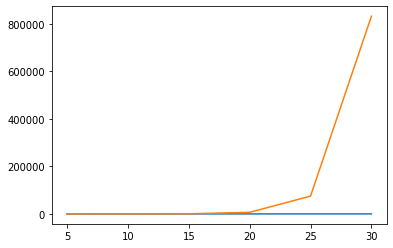

In [14]:
###Additional experiment###
#Comparison using graphs
#RFib has so much more additions than DFib
import matplotlib.pyplot as plt

plt.plot(n_list, add_d_list)
plt.plot(n_list, add_r_list)